1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [1]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
import io

In [2]:
# listings = pd.read_csv('redfin_real_estate.csv')

In [3]:
from google.colab import files
uploaded =files.upload()

listings = pd.read_csv(io.BytesIO(uploaded['redfin_real_estate.csv']))

Saving redfin_real_estate.csv to redfin_real_estate.csv


In [4]:
listings =listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



In [6]:
# Selecting the relevant columns
selected_columns = ['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']
data_selected = listings[selected_columns] # Use listings instead of data

# Checking for missing values in the selected columns
missing_values = data_selected.isnull().sum()

# Display the missing values
missing_values

,0
PROPERTY TYPE,1
PRICE,1
BEDS,11
BATHS,14
SQUARE FEET,16
LOT SIZE,41


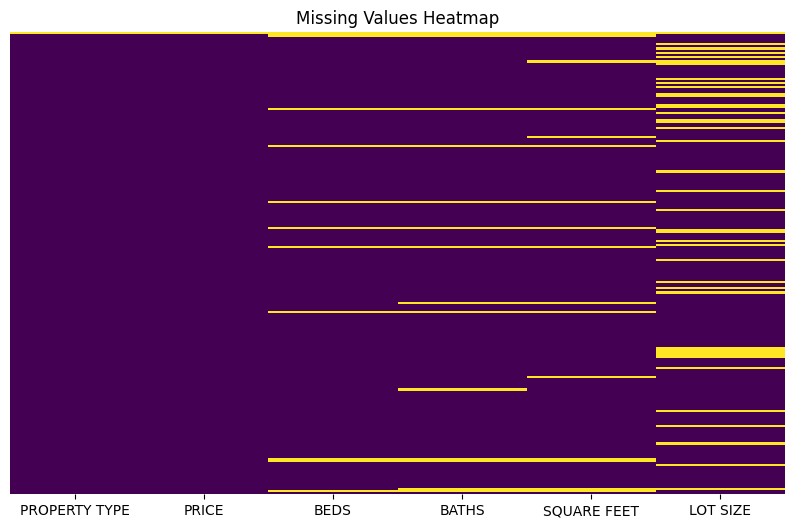

<ipython-input-7-82628b33824f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_selected, x='PROPERTY TYPE', palette='Set2')


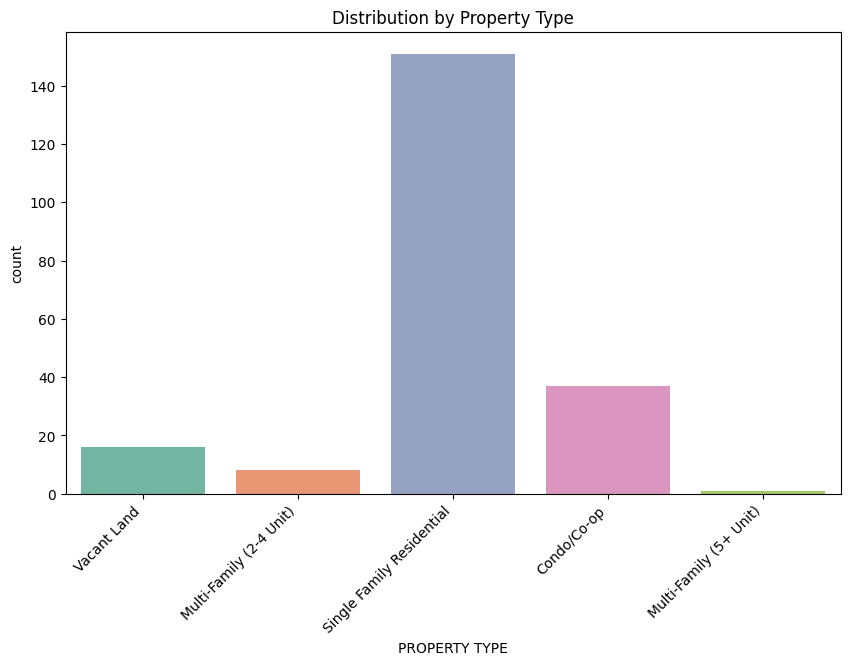

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure for the heatmap
plt.figure(figsize=(10, 6))

# Plotting the heatmap for missing values
sns.heatmap(data_selected.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Plotting the distribution of property types using a bar graph
plt.figure(figsize=(10, 6))
sns.countplot(data=data_selected, x='PROPERTY TYPE', palette='Set2')
plt.title('Distribution by Property Type')
plt.xticks(rotation=45, ha='right')
plt.show()

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

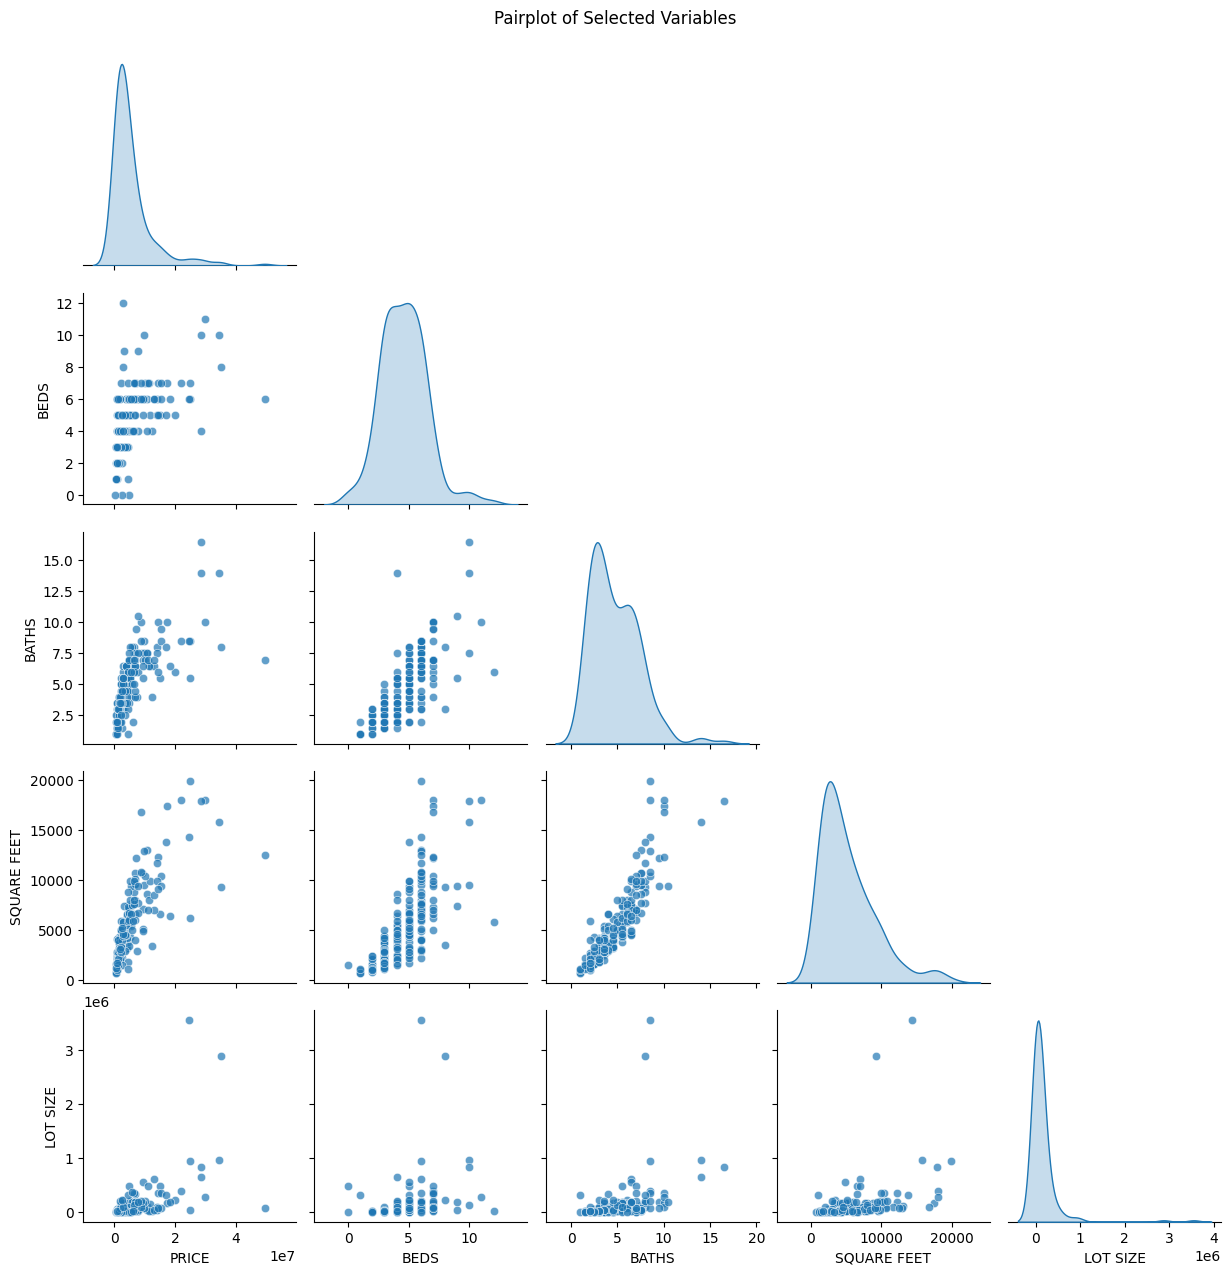

In [8]:
# Pairplot to evaluate data distributions and correlations
sns.pairplot(data_selected, diag_kind='kde', kind='scatter', plot_kws={'alpha':0.7}, corner=True)
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

1. Linear Relationship with the Target (Price):
BATHS and SQUARE FEET appear to have a positive linear relationship with PRICE. As the number of bathrooms and square footage increases, the property price seems to rise as well, with a noticeable trend in the scatter plot.
BEDS shows some clustering but does not display a clear linear relationship with PRICE. While there are properties with more beds that have higher prices, there is no strong consistent trend across the entire range.
LOT SIZE does not exhibit a clear linear relationship with PRICE. The scatter points are spread without any visible linear pattern, suggesting that lot size may not be as strongly correlated with property prices or may require transformation.
2. Constant Variance (Homoscedasticity):
From the pairplot, there are signs of heteroscedasticity (non-constant variance) in the residual spread of PRICE vs. predictors like SQUARE FEET and BATHS. The points are more concentrated at lower values and become more spread out as the predicted price increases. This suggests that the error variance increases with higher property prices.
Homoscedasticity might not hold in this model, indicating that a transformation of the PRICE variable (e.g., log transformation) could help stabilize variance and improve model performance.
3. Outliers:
PRICE appears to have some extreme outliers at the upper end. These are properties with extremely high prices compared to the rest of the dataset, and their inclusion could skew the model.
BATHS and BEDS also show some extreme values (e.g., properties with more than 10 bathrooms), which are rare and may be worth investigating to see if they should be excluded or treated differently.
LOT SIZE has several extreme values, which are considerably larger than most others in the dataset. These could be influential outliers that distort the model’s predictions for the majority of the properties.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [9]:
# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    # Filtering the data
    df_out = df[~((df[columns] < (Q1 - 1.5 * IQR)) |(df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Removing outliers for numeric columns: 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'
data_cleaned = remove_outliers(data_selected, ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'])


In [10]:
# Impute missing values for numeric columns with the median
data_cleaned['PRICE'].fillna(data_cleaned['PRICE'].median(), inplace=True)
data_cleaned['BEDS'].fillna(data_cleaned['BEDS'].median(), inplace=True)
data_cleaned['BATHS'].fillna(data_cleaned['BATHS'].median(), inplace=True)
data_cleaned['SQUARE FEET'].fillna(data_cleaned['SQUARE FEET'].median(), inplace=True)
data_cleaned['LOT SIZE'].fillna(data_cleaned['LOT SIZE'].median(), inplace=True)

# Impute missing values for categorical column with the mode
data_cleaned['PROPERTY TYPE'].fillna(data_cleaned['PROPERTY TYPE'].mode()[0], inplace=True)


<ipython-input-10-8e7abe73e178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['PRICE'].fillna(data_cleaned['PRICE'].median(), inplace=True)
<ipython-input-10-8e7abe73e178>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['BEDS'].fillna(data_cleaned['BEDS'].median(), inplace=True)
<ipython-input-10-8e7abe73e178>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['BATHS'].fillna(data_cleaned['BATHS

In [11]:
# Checking for any remaining missing values
data_cleaned.isnull().sum()

# Display the cleaned data
data_cleaned.head()


,PROPERTY TYPE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
0,Single Family Residential,2547500.0,4.0,3.5,3779.5,30492.0
1,Vacant Land,950000.0,4.0,3.5,3779.5,40075.0
2,Multi-Family (2-4 Unit),999999.0,6.0,2.0,2178.0,9147.0
3,Single Family Residential,1000000.0,3.0,2.5,2512.0,53578.0
4,Single Family Residential,2375000.0,5.0,3.5,2508.0,7840.0


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [12]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data_cleaned[['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]
y = data_cleaned['PRICE']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, r2_score
import numpy as np

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predicting the target values for the test data
y_pred = model.predict(X_test)


In [14]:
# Calculate R²
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate Max Error
max_err = max_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Report the metrics
print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'Max Error: {max_err}')
print(f'RMSE: {rmse}')


R²: 0.6612967513457303
MAE: 1190643.065659421
Max Error: 4176371.9288520943
RMSE: 1558737.0845107872


R² measures how well the independent variables explain the variance in the dependent variable (Price). A value closer to 1 indicates a good fit.
MAE gives the average error between predicted and actual prices.
Max Error shows the maximum deviation between predicted and actual prices.
RMSE gives a sense of the spread of errors, with lower values indicating a better model.
For practitioners, acceptable performance depends on the field and use case. Typically:

An R² value above 0.7-0.8 is considered good.
Lower values for MAE and RMSE are preferred.
Max Error should be reasonable, but large errors may suggest some price predictions need improvement.